# Computational Social Choice - Assignment 3
Yorick Juffer - s1993623 \
Ioana Cojocaru - s5002117

## Libraries

In [ ]:
import random
import copy
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Candidate List

In [ ]:
candidate = {
    1: "Jackie Kasabach",
    2: "Jack Johnson",
    3: "Adam Frisch",
    4: "Torre",
    5: "Michael Behrendt",
    6: "Jason Lasser",
    7: "Michael Wampler",
    8: "Derek Johnson",
    9: "Brian D. Speck",
    10: "Write In 1",
    11: "Write In 2"
}

## Functions

### Load Data
- Loads the data.txt file. 
- The output profile is a list, of which each element contains a vote (profile[n][0]) and preferences (profile[n][1:]).
- Each voters preferences are made unique so (profile[n][0]=1), so they can be easily manipulated. 
- If there is a tie ([1, 2]), both recieve a vote.

In [ ]:
def load(path): 
    profile = []

    with open(path, 'r') as file:
        for line in file:
            line = line.strip()

            # for each line, split the votes and preferences
            if line:
                votes_str, preferences_str = line.split(':')
                votes = int(votes_str)

                for _ in range(votes):

                    preferences = []
                    tied_preferences = []
                    tie = False

                    # add the preferences to the profile
                    # split the tied votes and add them as a list to the profile
                    for pref in preferences_str.split(','):
                        pref = pref.strip()

                        if "}" in pref:
                            pref = pref.replace('}', '')
                            tied_preferences.append(int(pref))
                            preferences.append(tied_preferences)
                            tie = False

                        elif "{" in pref or tie:
                            pref = pref.replace('{', '')
                            tied_preferences.append(int(pref))
                            tie = True
                        else:
                            preferences.append(int(pref))

                    # add the votes and preferences to the profile
                    profile.append(preferences)

    return profile

# load data and convert
file_path = 'data.txt'
original_profile = load(file_path)
profile_length = len(original_profile)

### Single Transferable Vote
- This function takes a profile and a list of candidates and returns the winner of the election using the STV social choice function. 
- The profile ranges alternatives from 1 to 11, but this function uses a 0-based index to represent the candidates.

In [ ]:
def single_transferable_vote(profile, candidates, print_status=False):
    eliminated_candidates = []

    round = 0
    while len(eliminated_candidates) < len(candidates):

        # reset the round
        round += 1
        tally = [0] * len(candidates)
        for index in eliminated_candidates:
            tally[index] = None
        lowest_votes = 0
        eliminate = []

        # tally the votes for each candidate
        for pref in profile:

            n = 0
            # search for the candidate with the highest preference that has not been eliminated
            searching = True
            while searching:

                # if the preference is a tie 
                if isinstance(pref[n], list):
                    m = 0

                    # for each tied preference, check if the candidate has been eliminated otherwise tally the votes
                    for _ in pref[n]:

                        if pref[n][m] - 1 not in eliminated_candidates:
                            candidate = pref[n][m] - 1
                            tally[candidate] += 1

                        m += 1
                        if m >= len(pref[n]):
                            searching = False

                # check if the candidate has been eliminated
                elif pref[n] - 1 not in eliminated_candidates:
                    candidate = pref[n] - 1
                    tally[candidate] += 1
                    searching = False

                n += 1
                if n >= len(pref):
                    searching = False

        # eliminate the candidate with the lowest votes
        lowest_votes = min(value for value in tally if value is not None)
        eliminate = [i for i, value in enumerate(tally) if value == lowest_votes]
        eliminated_candidates.extend(eliminate)

        # find the winner
        highest_votes = max(value for value in tally if value is not None)
        winner = [i for i, value in enumerate(tally) if value == highest_votes]

        if print_status:
            print("---ROUND {}---".format(round))
            print("Tally: {}".format(tally))
            print("Eliminated {}:".format(eliminate))
            print()

    return winner, highest_votes

### Manipulate Functions
- Take in a P and output P'

In [ ]:
# Change target to the first position candidate of n voters.
def targetfront_manipulate(profile, n, target):

    rng = random.sample(range(0, len(profile)), n)

    for index in rng:    
        pref = profile[index]
        if target in pref:
            pref.remove(target)
        pref.insert(0, target)
        profile[index] = pref

    return profile

# Change target to the last position candidate of n voters.
def targetback_manipulate(profile, n, target):

    rng = random.sample(range(0, len(profile)), n)

    for index in rng:    
        pref = profile[index]
        if target in pref:
            pref.remove(target)
        pref.insert(len(profile), target)
        profile[index] = pref

    return profile

# Randomly shuffle the preferences of n voters.
def random_manipulate(profile, n):
     
    rng = random.sample(range(0, len(profile)), n)

    for index in rng:
        pref = profile[index]
        random.shuffle(pref)
        profile[index] = pref

    return profile

## Results
- 1: "Jackie Kasabach",
- 2: "Jack Johnson",
- 3: "Adam Frisch",
- 4: "Torre",
- 5: "Michael Behrendt",
- 6: "Jason Lasser",
- 7: "Michael Wampler",
- 8: "Derek Johnson",
- 9: "Brian D. Speck",
- 10: "Write In 1",
- 11: "Write In 2"

In [ ]:
profile_length = len(original_profile)

# FIND THE WINNER
profile1 = copy.deepcopy(original_profile)
original_results = single_transferable_vote(profile1, candidate, print_status=True)
for result in original_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

# MANIPULATE THE VOTES BY RANDAOM PREFERENCE SHUFFLE
# printing results turned off 
profile2 = copy.deepcopy(original_profile)
manipulated_profile = random_manipulate(profile2, profile_length)
manipulated_results = single_transferable_vote(manipulated_profile, candidate)
for result in manipulated_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

# MANIPULATE THE VOTES BY TARGETING A CANDIDATE
# printing results turned off 
profile3 = copy.deepcopy(original_profile)
manipulated_profile = targetfront_manipulate(profile3, profile_length, 4)
manipulated_results = single_transferable_vote(manipulated_profile, candidate)
for result in manipulated_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

profile4 = copy.deepcopy(original_profile)
manipulated_profile = targetback_manipulate(profile4, profile_length, 4)
manipulated_results = single_transferable_vote(manipulated_profile, candidate)
for result in manipulated_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

## Grid Search to Find P'

In [ ]:
# run the impact of random manipulations across parameters
def random_grid_search(profile, original_results, n, i_max, i_min):
        
    results = []

    while n > 0:

        i = 0
        exit_loop = False
        while i < i_max:
            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = random_manipulate(x, n)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i])

                if not original_results[0] == output[0] and i >= i_min:
                    exit_loop = True
                    break
            if exit_loop:
                break      
            i += 1
        n -= 1
        print("SEARCHING: n = {}, i = {}, ".format(n, i))
        
    return results

# run the impact of target manipulations across parameters
def targetfront_grid_search(profile, original_results, n, i_max, i_min):

    n_max = n  
    results = []

    for target in range(len(candidate)): 
        while n > 0:

            i = 0
            exit_loop = False
            while i < i_max:
                for _ in range(i):
                    x = copy.deepcopy(profile)
                    manipulated_profile = targetfront_manipulate(x, n, target+1)
                    output = single_transferable_vote(manipulated_profile, candidate)
                    results.append([original_results[0] == output[0], n, i, target+1])

                    if not original_results[0] == output[0] and i >= i_min:
                        exit_loop = True
                        break
                if exit_loop:
                    break
                i += 1
            n -= 1
            print("SEARCHING: n = {}, i = {}, target = {}, ".format(n, i, target+1))
        
        n = n_max
            
    return results

def targetback_grid_search(profile, original_results, n, i_max, i_min):

    n_max = n  
    results = []

    for target in range(len(candidate)): 
        while n > 0:

            i = 0
            exit_loop = False
            while i < i_max:
                for _ in range(i):
                    x = copy.deepcopy(profile)
                    manipulated_profile = targetback_manipulate(x, n, target+1)
                    output = single_transferable_vote(manipulated_profile, candidate)
                    results.append([original_results[0] == output[0], n, i, target+1])

                    if not original_results[0] == output[0] and i >= i_min:
                        exit_loop = True
                        break
                if exit_loop:
                    break      
                i += 1
            n -= 1
            print("SEARCHING: n = {}, i = {}, target = {}, ".format(n, i, target+1))
        
        n = n_max
            
    return results

## Binary Search Search to Find P'

In [ ]:
# run the impact of random manipulations across parameters
def random_binary(profile, original_results, n, i):
        
    results = []
    n_min = 0
    n_max = n

    while n > 0:

        found = False

        for _ in range(i):
            x = copy.deepcopy(profile)
            manipulated_profile = random_manipulate(x, n)
            output = single_transferable_vote(manipulated_profile, candidate)
            results.append([original_results[0] == output[0], n, i])

            if not original_results[0] == output[0]:
                output = copy.deepcopy(manipulated_profile)
                found = True

        if abs(n_max - n_min) <= 1:
            break
        elif found:
            n_max = n
            n = round(n * 0.5)
            print("FOUND")
        else:
            n_min = n
            n = round((n_max - n)/2 + n)
            print("NOT FOUND")

        print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, ".format(n, n_max, n_min, i))
        
    return results, output

## Analysis

### RANDOM SEARCH

In [ ]:
n = 1000
i_max = 10
i_min = 3

results = random_grid_search(original_profile, original_results, n, i_max, i_min)
csv_file_path = 'results_random_grid.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i'])
    writer.writerows(results)

print("Results saved to {}".format(csv_file_path))

In [ ]:
# DARW PLOTS
df = pd.read_csv('results_random_grid.csv')

proportions = df.groupby('n')['match'].mean()
proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()

### RANDOM BINARY SEARCH

In [31]:
n = profile_length
i = 100

results_random_binary, random_binary_profile = random_binary(original_profile, original_results, n, i)
csv_file_path = 'results_random_binary.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i'])
    writer.writerows(results_random_binary)

print("Results saved to {}".format(csv_file_path))

FOUND
SEARCHING: n = 1238, n_max = 2477, n_min = 0, i = 100, 
FOUND
SEARCHING: n = 619, n_max = 1238, n_min = 0, i = 100, 
NOT FOUND
SEARCHING: n = 928, n_max = 1238, n_min = 619, i = 100, 
FOUND
SEARCHING: n = 464, n_max = 928, n_min = 619, i = 100, 
NOT FOUND
SEARCHING: n = 696, n_max = 928, n_min = 464, i = 100, 
FOUND
SEARCHING: n = 348, n_max = 696, n_min = 464, i = 100, 
NOT FOUND
SEARCHING: n = 522, n_max = 696, n_min = 348, i = 100, 
NOT FOUND
SEARCHING: n = 609, n_max = 696, n_min = 522, i = 100, 
NOT FOUND
SEARCHING: n = 652, n_max = 696, n_min = 609, i = 100, 
NOT FOUND
SEARCHING: n = 674, n_max = 696, n_min = 652, i = 100, 
NOT FOUND
SEARCHING: n = 685, n_max = 696, n_min = 674, i = 100, 
FOUND
SEARCHING: n = 342, n_max = 685, n_min = 674, i = 100, 
NOT FOUND
SEARCHING: n = 514, n_max = 685, n_min = 342, i = 100, 
NOT FOUND
SEARCHING: n = 600, n_max = 685, n_min = 514, i = 100, 
NOT FOUND
SEARCHING: n = 642, n_max = 685, n_min = 600, i = 100, 
NOT FOUND
SEARCHING: n = 664, 

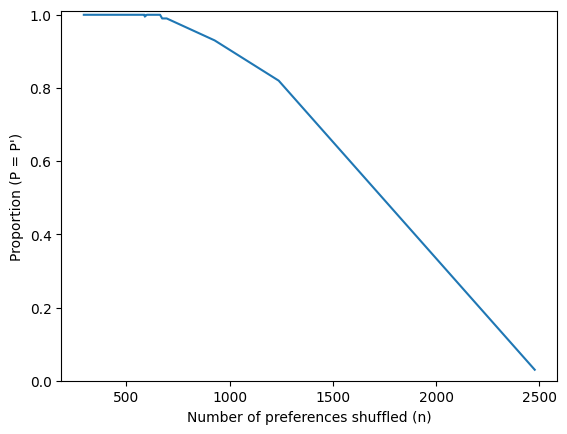

In [32]:
df = pd.read_csv('results_random_binary.csv')

proportions = df.groupby('n')['match'].mean()
proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.show()

### TARGET FRONT SEARCH 
- Target is the candidate that n wants to win.

In [ ]:
n = 1000
i_max = 10
i_min = 3

results = targetfront_grid_search(original_profile, original_results, n, i_max, i_min)
csv_file_path = 'results_target.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results)

print("Results saved to {}".format(csv_file_path))

In [ ]:
df = pd.read_csv('results_target.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# Plot a line for each 'target'
for target in proportions.columns:
    plt.plot(proportions.index, proportions[target], label=f'Target {target}')

# Add labels and legend
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion of True")
plt.ylim(0, 1.01)
plt.legend(title='Targets')

# Show the plot
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()

### TARGET BACK SEARCH 

In [ ]:
n = 1000
i_max = 10
i_min = 3

results = targetback_grid_search(original_profile, original_results, n, i_max, i_min)
csv_file_path = 'results_targetback.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results)

print("Results saved to {}".format(csv_file_path))

In [ ]:
df = pd.read_csv('results_targetback.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# Plot a line for each 'target'
for target in proportions.columns:
    plt.plot(proportions.index, proportions[target], label=f'Target {target}')

# Add labels and legend
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion of True")
plt.ylim(0, 1.01)
plt.legend(title='Targets')

# Show the plot
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()